# Bank Marketing Campaign

## 1. Introduction

Nowadays, organizations which hire data scientists are especially interested in improvement of the financial results. Analysis of organization's marketing data is one of the most typical applications of data science and machine learning. Such analysis will definitely be a good contribution to the profit of the company.

Datasets which contains marketing data can be used for 2 different business goals:

Prediction of the results of the marketing campaign and of factors that has influences in the campaign results. This helps to find out the best way to make marketing campaigns more efficient.
Finding out customer segments, using data for customers, who subscribed to term deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns.

This dataset contains banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to term deposit subscription.

Approach
In order to optimize marketing campaigns with the help of the dataset, we will have to take the following steps:

- Import data from dataset and perform initial high-level analysis: look at the number of rows, look at the missing values, look at dataset columns and their values respective to the campaign outcome.
- Clean the data: remove irrelevant columns, deal with missing and incorrect values, turn categorical columns into dummy variables.
- Use machine learning techniques to predict the marketing campaign outcome and to find out factors, which affect the success of the campaign.



Variables Descriptions:

Ai. bank client data:

1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.

Aii. Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Aiii. other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## 2. Importing libraries

After the definition  and the having in mind the purpose of this project , the first thing to do is the import all the libraries that will help to achieve our goals.

In [1]:
# Standard data analysis and wrangling libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy.stats import boxcox

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Various ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection import RFE

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_val_score

# Warning filter
import warnings
warnings.filterwarnings('ignore')

## 3. Data importing

In the section it will be imported the dataset received from the company and it will be observed the content inside it.

In [2]:
#Loading the dataset
data = pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
#Getting the size of the data
data.shape

(11162, 17)

In [4]:
#Getting the columns name
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
#General information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## 4. Data Cleaning

It will be done the cleaning of the data, all the missing value problem will be solved and it will be analyzed all the data distribution 

In [6]:
#Checking if the data contains missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

As shown above, the dataset doesn't have missing values

In [7]:
#Checking if the data contains duplicated values
data.duplicated().sum()

0

In [8]:
#Analysing the data on each column
for a in data.columns:
    print(data[a].value_counts().sort_values(ascending=False))
    print()

31    496
32    477
34    466
33    464
35    461
     ... 
90      2
88      2
93      2
89      1
95      1
Name: age, Length: 76, dtype: int64

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

no     10994
yes      168
Name: default, dtype: int64

0        774
1         39
3         35
2         34
4         29
        ... 
7298       1
13849      1
7290       1
1145       1
7561       1
Name: balance, Length: 3805, dtype: int64

no     5881
yes    5281
Name: housing, dtype: int64

no     9702
yes    1460
Name: loan, dtype: int64

cellular     8042
unknown      2346
t

The data presents reliable information

## 5. EDA (Exploratory Data Analysis)

In this section, it will be analized the relationship between the features. It will be focused around our target variable "deposit"


In [9]:
sns.set_style('darkgrid')

In [10]:
#Descritive statistics information
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
#Getting the categorical attributes
categorical_attributes = data.select_dtypes(include=['object']).columns
categorical_attributes


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [12]:
#Analysing the different features inside the categorial attributes
for col_name in data.columns:
    if data[col_name].dtypes == 'object':
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'job' has 12 unique categories
Feature 'marital' has 3 unique categories
Feature 'education' has 4 unique categories
Feature 'default' has 2 unique categories
Feature 'housing' has 2 unique categories
Feature 'loan' has 2 unique categories
Feature 'contact' has 3 unique categories
Feature 'month' has 12 unique categories
Feature 'poutcome' has 4 unique categories
Feature 'deposit' has 2 unique categories


In [13]:
#Getting the numerical attributes
numerical_attributes = list(data.select_dtypes(include=['float64', 'int64']).columns)
numerical_attributes

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

<Figure size 1440x1080 with 0 Axes>

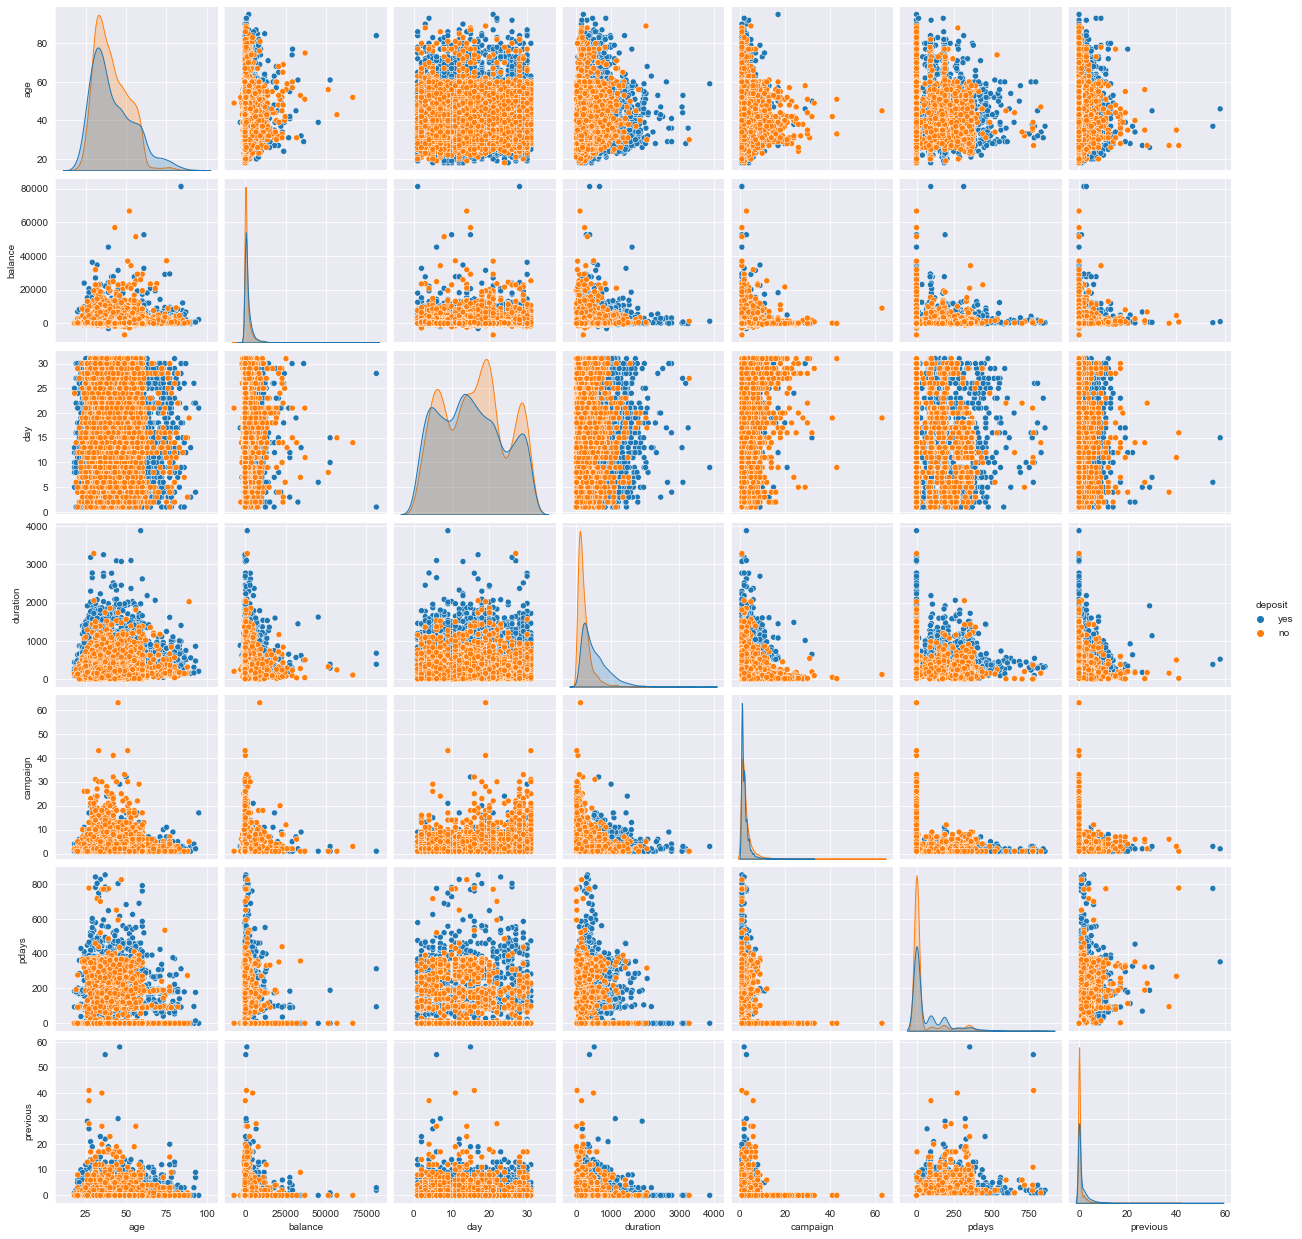

In [14]:
#Relationship between the numerical attributes
plt.figure(figsize=(20,15))
ax = sns.pairplot(data,hue = 'deposit')
plt.show()

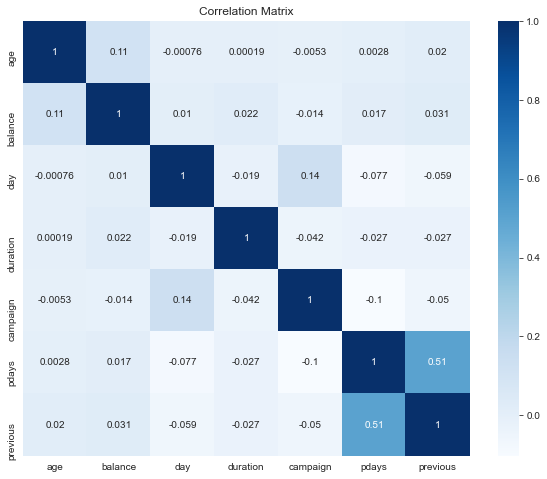

In [14]:
#Plotting the correlation matrix of the numerical features
plt.figure(figsize = (10,8))
plt.title("Correlation Matrix")
sns.heatmap(data.corr(),annot = True, cmap = "Blues" )

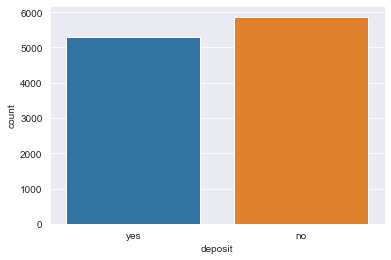

In [15]:
#Checking if the dataset is balanced
sns.countplot(data['deposit'])

As shown above, the dataset isn't imbalanced.

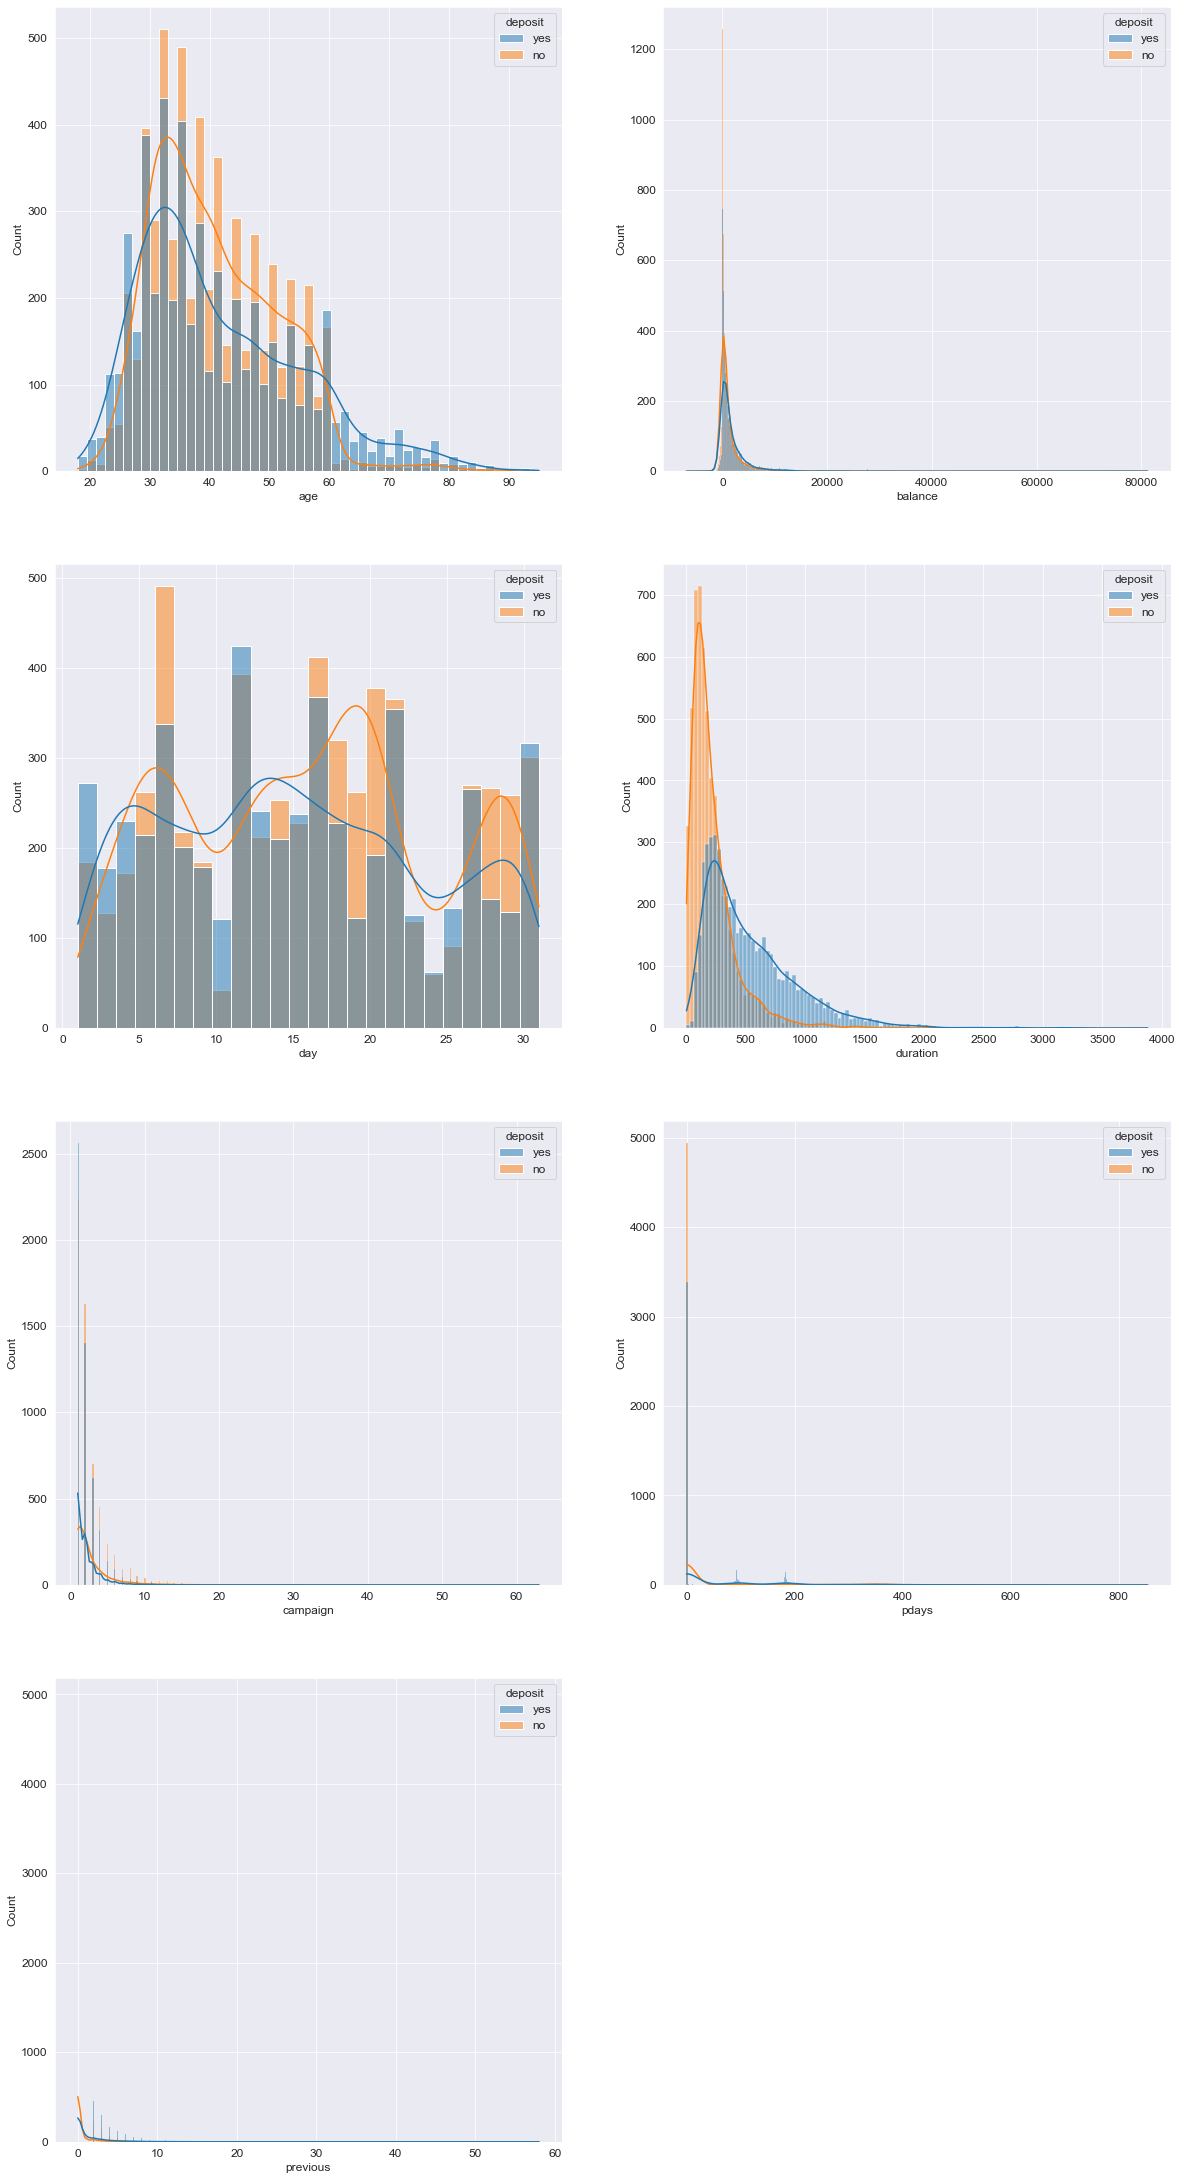

In [17]:
#Relationship between the numerical attributes
plt.figure(figsize=(20, 70))
plt.rcParams.update({'font.size': 12})
plt.subplot(7,2,1)
sns.histplot(data= data, x = numerical_attributes[0], hue ='deposit', kde = True)
plt.subplot(7,2,2)
sns.histplot(data= data, x = numerical_attributes[1], hue ='deposit', kde = True)
plt.subplot(7,2,3)
sns.histplot(data= data, x = numerical_attributes[2], hue ='deposit', kde = True)
plt.subplot(7,2,4)
sns.histplot(data= data, x = numerical_attributes[3], hue ='deposit', kde = True)
plt.subplot(7,2,5)
sns.histplot(data= data, x = numerical_attributes[4], hue ='deposit', kde = True)
plt.subplot(7,2,6)
sns.histplot(data= data, x = numerical_attributes[5], hue ='deposit', kde = True)
plt.subplot(7,2,7)
sns.histplot(data= data, x = numerical_attributes[6], hue ='deposit', kde = True)
plt.show()

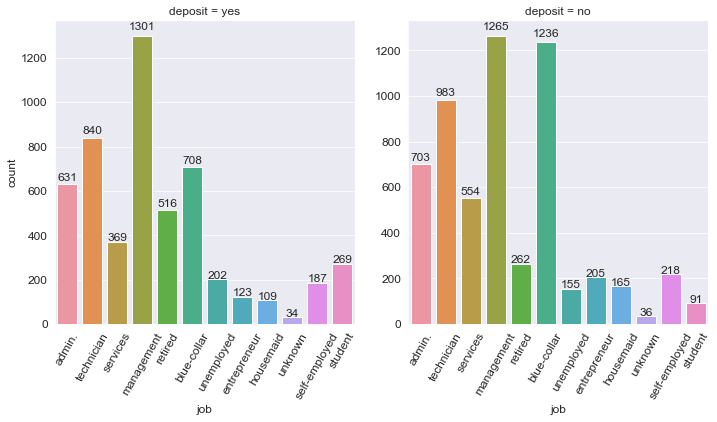

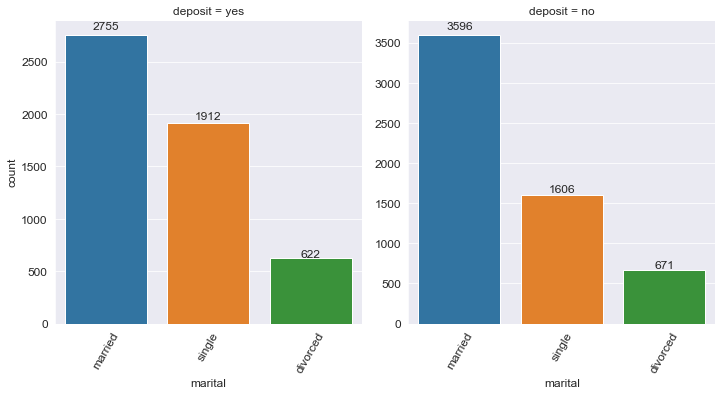

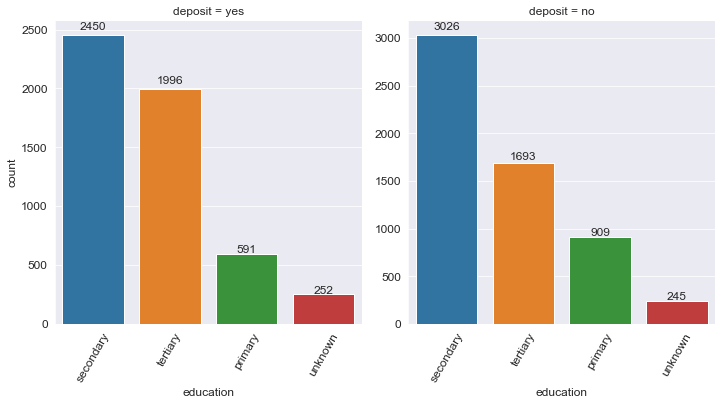

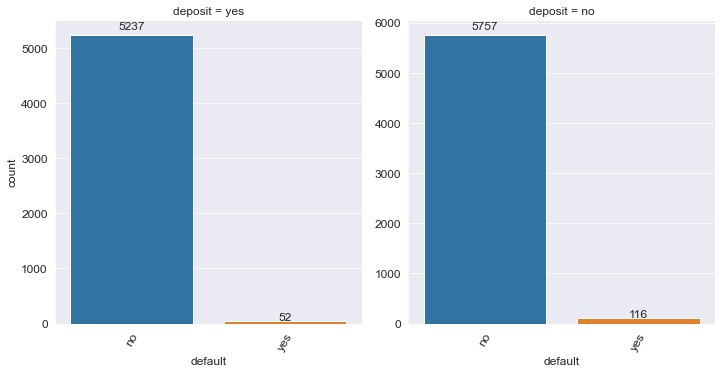

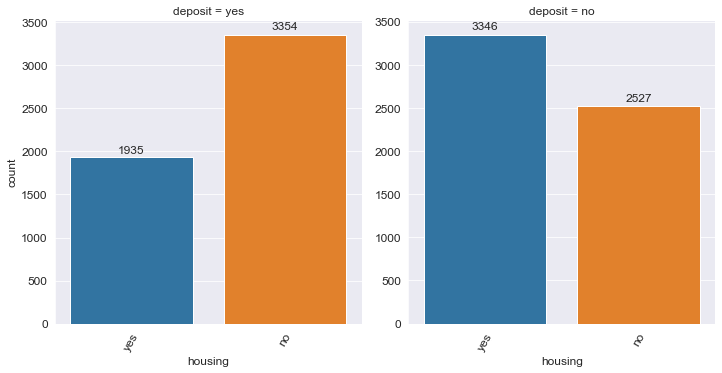

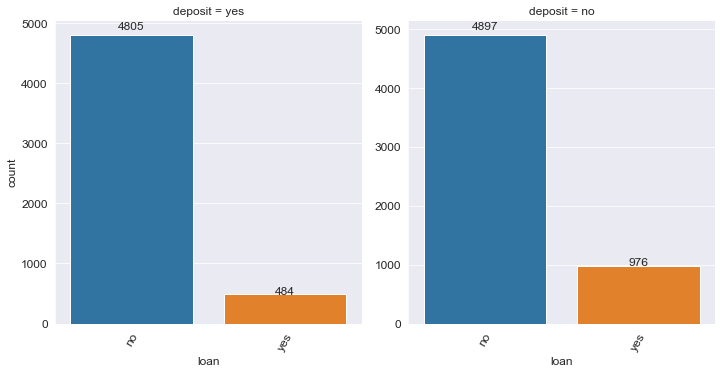

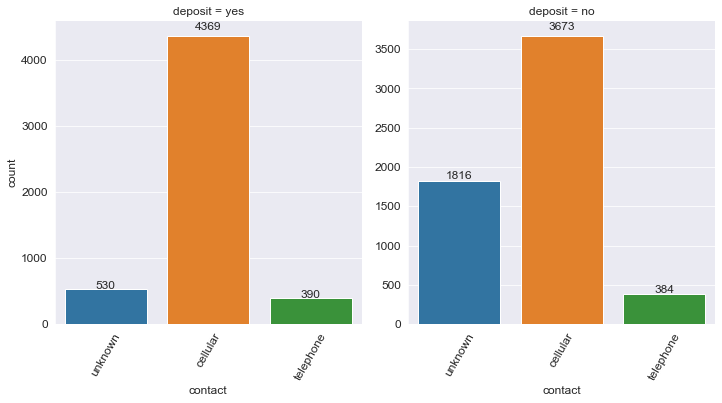

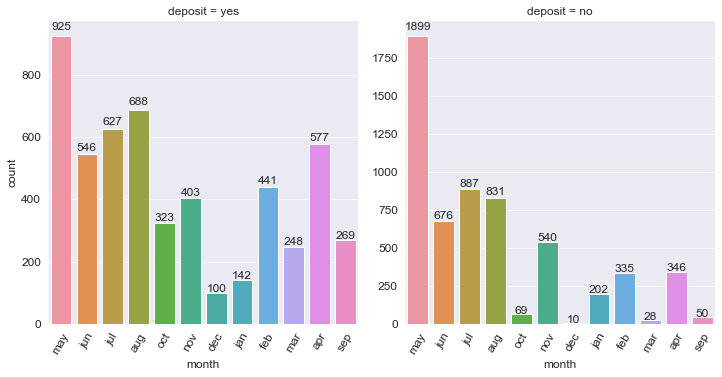

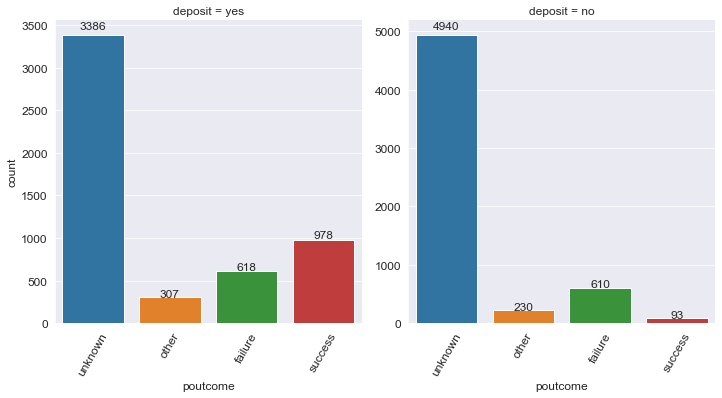

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


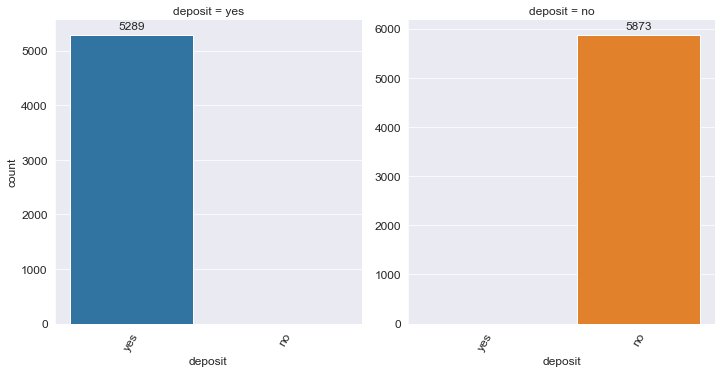

In [19]:
#Relationship between the categorical attributes
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 15:
        g = sns.catplot(x = col, kind='count', col = 'deposit', data=data, sharey=False)
        g.set_xticklabels(rotation=60)
        for i in range(data['deposit'].nunique()):
            ax = g.facet_axis(0,i)
            for p in ax.patches:
                height = p.get_height()
                ax.text(x = p.get_x()+(p.get_width()/2), y = height * 1.02 , s = '{:.0f}'.format(height), ha = 'center')


- Age: People around 30 years old are more likely to do a deposit
- Balance: People with low balance are more likely to do a deposit
- Day: It doesn't have much influence in the deposit
- Duration: Duration around 150 are more likely to do a deposit
- Campaign: 1 campaign brings the best results
- Pdays: Low dpays showed better results
- Previous: 0 previous has better results
- Job: Students and retireds are more likely to do a deposit
- Marital: Single persons are more likely to do a deposit
- Education: Tertiary has better results
- Housing: People with no Housing are more likely do to a deposit
- Loan: People that do loan has more chance of doing a deposit
- Contact: Cellular contact has better results
- Month: February, March, April, September and October are the best month to do Marketing

## 6. Feature engineering

In this section the categorical features will be treated. Machine Learning models don't understand this type os varible, so they need to be transformed to numerical variable using some techniques to maintain their importance on the results of this project.

In [20]:
#Transforming the deposit condition
data['deposit'] = data['deposit'].map({'no':0,'yes':1})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [21]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [22]:
data_dummies = pd.get_dummies(data, columns = categorical_features)
data_dummies

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### 6.1 Feature selection

Now the next part of the project is Feature Selection. Using some algorithms, it will be possible to determinate which feature has more
relevance to solve the problem of this project. It will also help to reduce overfitting and make the solution faster.


In [43]:
#Declaring the x and y variables
x = data_dummies.drop(['deposit','job_admin.'], axis =1)
y = data_dummies['deposit']

In [44]:
#Selection the 5 best features using SelectKBest
selector = SelectKBest(f_classif, k=8)
x_feature_selected = selector.fit_transform(x, y)
#Get the 5 columns name of the selected feature
x.columns[selector.get_support(indices=True)]


Index(['duration', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_unknown', 'month_may', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

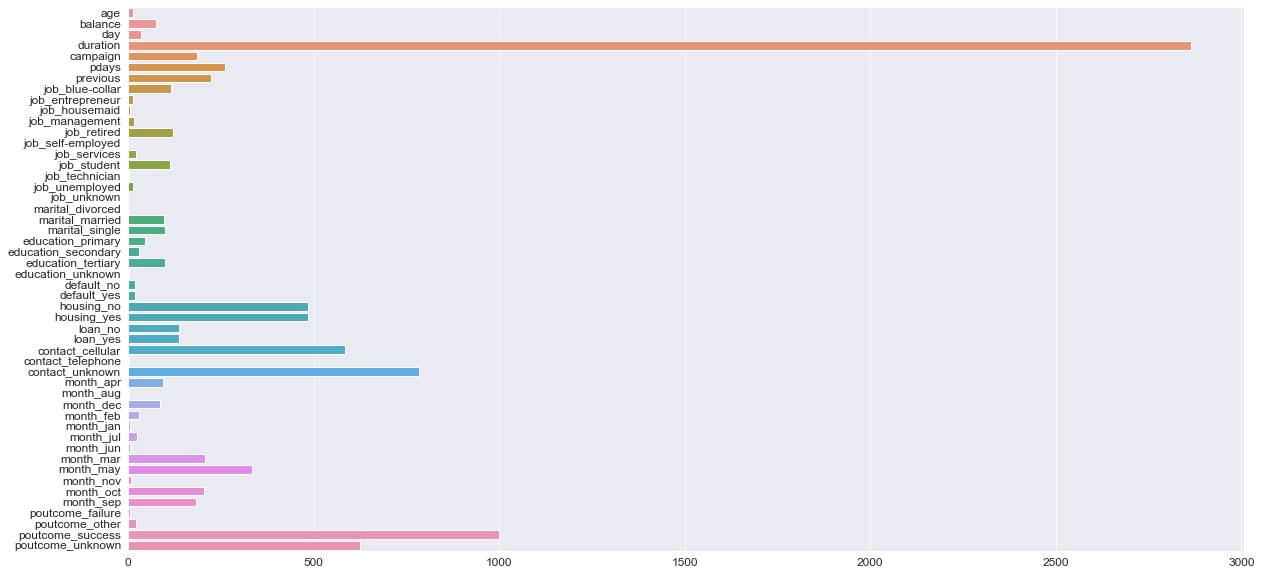

In [45]:
#Showing the score of all features
plt.figure(figsize =(20,10))
sns.barplot(y=x.columns, x = selector.scores_)

In [46]:
#Getting the best features using Random Forest
model = RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [47]:
#Making a dataframe of the selected features of Random Forest model
feat_select = pd.DataFrame({'Feature': x.columns ,'Importance': model.feature_importances_})
feat_select.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
3,duration,0.328972
1,balance,0.077966
0,age,0.073360
2,day,0.066524
4,campaign,0.034439
5,pdays,0.032564
48,poutcome_success,0.030056
33,contact_unknown,0.024143
6,previous,0.022212
27,housing_no,0.016411


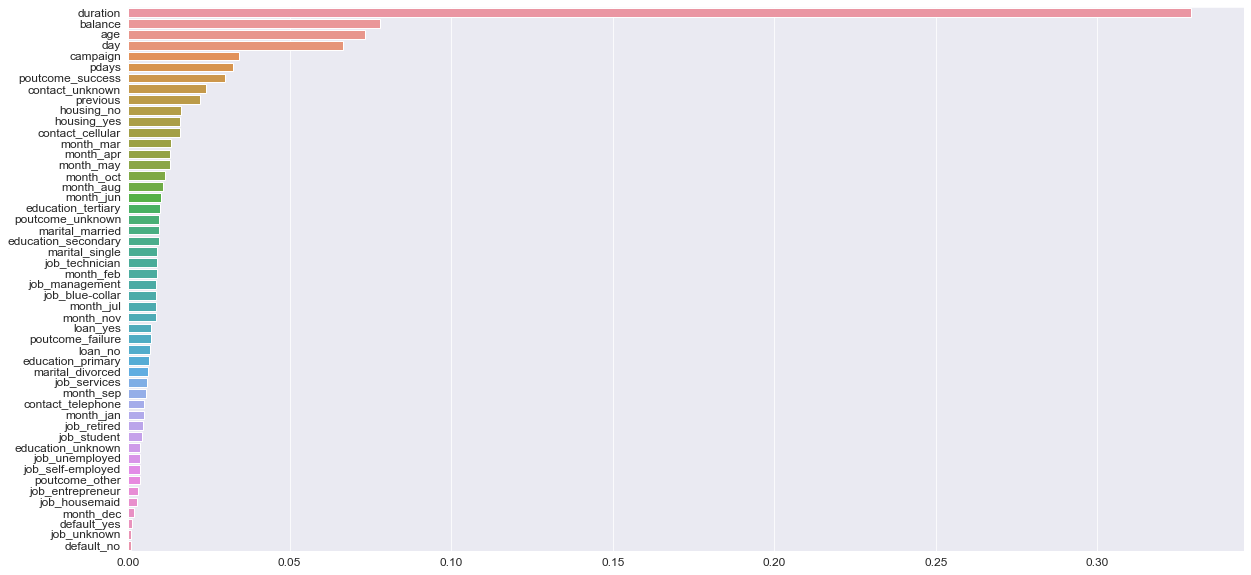

In [48]:
plt.figure(figsize =(20,10))
sns.barplot(y= x.columns, x = model.feature_importances_ , order = feat_select.sort_values(by = 'Importance', ascending = False)['Feature'])

In [49]:
 #Getting the best features using Recursive Feature Elimination
selector = RFE(model, n_features_to_select=8)
x_feature_selected = selector.fit_transform(x, y)
#Get the 5 columns name of the selected feature
x.columns[selector.get_support(indices=True)]

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'contact_unknown', 'poutcome_success'],
      dtype='object')

By the results of these different methods, the chosen features are:
- duration
- balance
- day
- age
- pdays
- poutcome_success
- campaign
- contact_unknown

## 7. Presets of the models

In this section it will setted some parameters that it will be used by the machine learning algorithms. Here it be declared your X variables and Y variables. It was also developed a function that splits the featuring to train and test variables to be used by the models and measure the algorithm performance by using some metrics.

In [50]:
#Declaring our X features
x = data_dummies[['age', 'balance', 'day', 'duration', 'campaign', 'pdays','contact_unknown', 'poutcome_success']]
x

,age,balance,day,duration,campaign,pdays,contact_unknown,poutcome_success
0,59,2343,5,1042,1,-1,1,0
1,56,45,5,1467,1,-1,1,0
2,41,1270,5,1389,1,-1,1,0
3,55,2476,5,579,1,-1,1,0
4,54,184,5,673,2,-1,1,0
...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0
11158,39,733,16,83,4,-1,1,0
11159,32,29,19,156,2,-1,0,0
11160,43,0,8,9,2,172,0,0


In [51]:
#Declaring your Y feature
y = data_dummies['deposit']
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [52]:
#List to get the score of the models
results = []

In [53]:
def classify(model,x,y,name):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =66)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = np.mean(cross_val_score(model, x, y, cv = 10, scoring = 'accuracy'))
    results.append([name,score])

The chosen metrics to evaluate the performance of the machine learning model is accuracy. It's possible to use this metrics because the dataset is balanced and we would like to check how many correct predictions the algorithms can make.

## 8. Machine Learning Models

In this section will be defined all the algorithms that it will be used and it will be tested them all. It will also be analyzed the performance of each one using some metrics, so it will find the best model to this project.

In [54]:
#Test of all the models

model = LogisticRegression()
classify(model,x,y,'Logistic Regression')

model = DecisionTreeClassifier()
classify(model,x,y,"Decision Tree")

model = RandomForestClassifier()
classify(model,x,y,"Random Forest")

model = GradientBoostingClassifier()
classify(model,x,y,'Gradient Boost')

model = AdaBoostClassifier()
classify(model,x,y,'Ada Boost')

model = XGBClassifier()
classify(model,x,y,'XGBoost')

model = SVC()
classify(model,x,y,'SVM')

model = KNeighborsClassifier()
classify(model,x,y,'KNN')

model = GaussianNB()
classify(model,x,y,'Naive Bayes')

model = MLPClassifier()
classify(model,x,y,'Neural Network')


[09:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [55]:
#Getting the results of the models tested
result = pd.DataFrame(results)
result.columns = ['Models','Accuracy']
result.sort_values(by='Accuracy', ascending = False)

,Models,Accuracy
3,Gradient Boost,0.793409
5,XGBoost,0.789918
2,Random Forest,0.788127
4,Ada Boost,0.781767
0,Logistic Regression,0.756309
7,KNN,0.745732
6,SVM,0.733356
1,Decision Tree,0.719770
8,Naive Bayes,0.716725
9,Neural Network,0.714396


The Machine Learning algorithm that had the best results according to the dataframe shown above is Gradient Boost. This model had and accuracy metric of 0.793 and this value represents a very good prediction made.

OBS: The Highest value of accuracy metric is 1.


## 9. Conclusion 

Solutions for the Next Marketing Campaign (Conclusion):

1) Months of Marketing Activity: We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

2) Seasonality: Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

3) Campaign Calls: A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

4) Age Category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.

5) Occupation: Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

6) House Loans and Balances: Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.


7) Develop a Questionaire during the Calls: Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.


8) Target individuals with a higher duration (above 375): Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.


By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.